In [1]:
import yt
import yt.extensions.geotiff

### Read GeoTIFF with yt

In [19]:
filename = 'S2A_MSIL2A_20200601T113331_N0214_R080_T30UVG_20200601T123416_20m.tif'
ds = yt.load(filename, field_map="sentinel2_fields.yaml")

yt : [INFO     ] 2020-07-01 17:52:03,995 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-07-01 17:52:03,997 Parameters: domain_dimensions         = [5490 5490    1]
yt : [INFO     ] 2020-07-01 17:52:03,999 Parameters: domain_left_edge          = [0. 0. 0.] m
yt : [INFO     ] 2020-07-01 17:52:04,003 Parameters: domain_right_edge         = [1.0981e+05 1.0981e+05 1.0000e+00] m
yt : [INFO     ] 2020-07-01 17:52:04,009 Parameters: cosmological_simulation   = False


### A quick inspection
For the Sentinel 2 constellation, the red, green and blue bands are the forth, third and second bands respectively. After loading the geotiff with yt, we can have a quick look at each of these bands.

yt : [INFO     ] 2020-07-01 17:53:11,193 xlim = 0.000000 109810.000000
yt : [INFO     ] 2020-07-01 17:53:11,194 ylim = 0.000000 109810.000000
yt : [INFO     ] 2020-07-01 17:53:11,195 xlim = 0.000000 109810.000000
yt : [INFO     ] 2020-07-01 17:53:11,196 ylim = 0.000000 109810.000000
yt : [INFO     ] 2020-07-01 17:53:11,199 Making a fixed resolution buffer of (('sentinel2', 'B04')) 800 by 800



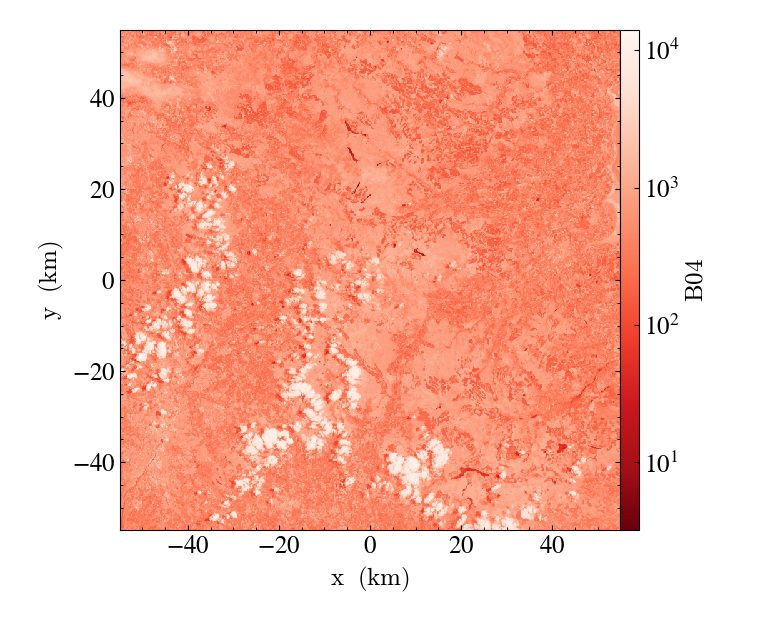

In [21]:
r = yt.SlicePlot(ds, 'z', ('sentinel2', 'B04'))
r.set_cmap(field=('sentinel2', 'B04'), cmap='Reds_r')
r.set_figure_size(5)

yt : [INFO     ] 2020-07-01 17:53:34,838 xlim = 0.000000 109810.000000
yt : [INFO     ] 2020-07-01 17:53:34,840 ylim = 0.000000 109810.000000
yt : [INFO     ] 2020-07-01 17:53:34,844 xlim = 0.000000 109810.000000
yt : [INFO     ] 2020-07-01 17:53:34,846 ylim = 0.000000 109810.000000
yt : [INFO     ] 2020-07-01 17:53:34,856 Making a fixed resolution buffer of (('sentinel2', 'B03')) 800 by 800



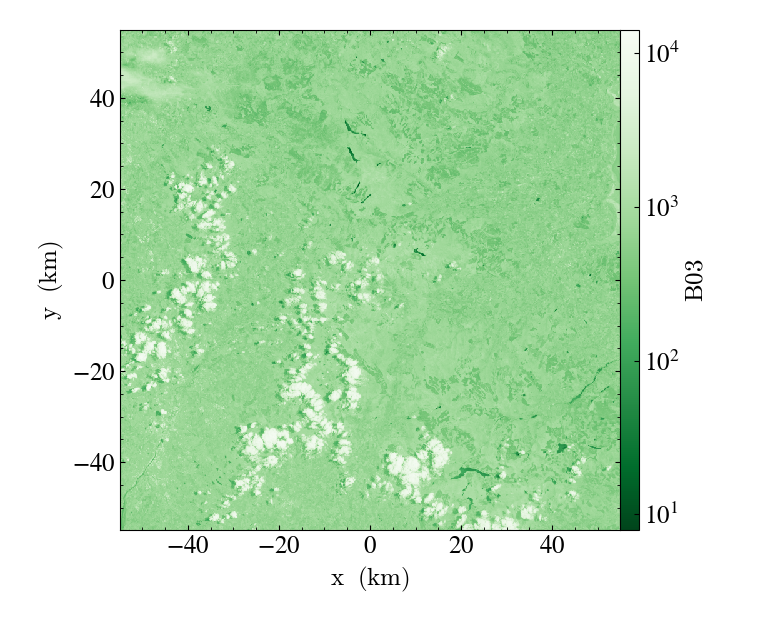

In [22]:
g = yt.SlicePlot(ds, 'z', ('sentinel2', 'B03'))
g.set_cmap(field=('sentinel2', 'B03'), cmap='Greens_r')
g.set_figure_size(5)

yt : [INFO     ] 2020-07-01 17:53:58,951 xlim = 0.000000 109810.000000
yt : [INFO     ] 2020-07-01 17:53:58,953 ylim = 0.000000 109810.000000
yt : [INFO     ] 2020-07-01 17:53:58,958 xlim = 0.000000 109810.000000
yt : [INFO     ] 2020-07-01 17:53:58,962 ylim = 0.000000 109810.000000
yt : [INFO     ] 2020-07-01 17:53:58,973 Making a fixed resolution buffer of (('sentinel2', 'B02')) 800 by 800



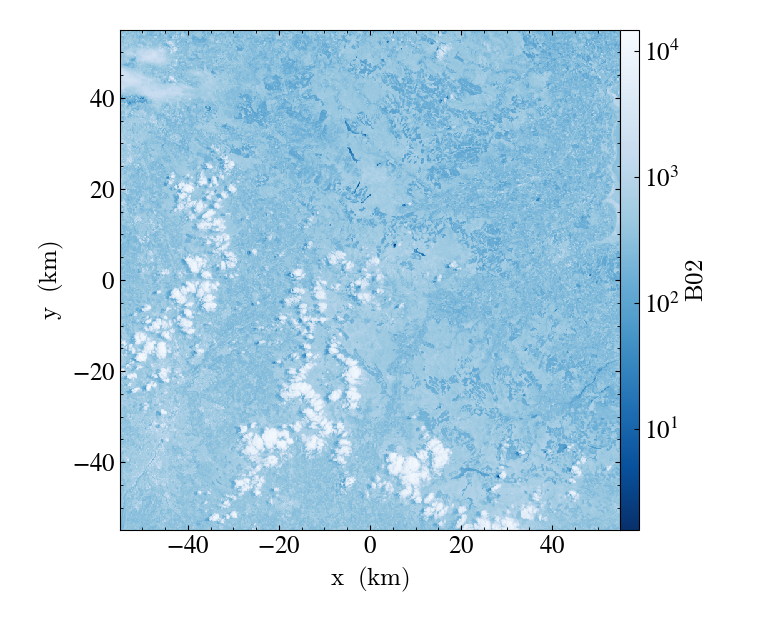

In [23]:
b = yt.SlicePlot(ds, 'z', ('sentinel2', 'B02'))
b.set_cmap(field=('sentinel2', 'B02'), cmap='Blues_r')
b.set_figure_size(5)

### Normalised Difference Vegetation Index (NDVI) and Normalised Difference Water Index (NDWI)

Here is an example of a couple of things we can easily calculate once the data is loaded into yt. Firstly, the [Normalised Difference Vegetation Index](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index)! This is used to monitor vegetation density and health by comparing the reflectance of red (R) and near infrared (NIR) bands.
For our case here the NIR band is the 9 band in the GeoTIFF we created and the R band is 3.

In [24]:
def _ndvi(field, data):
    return (data[('sentinel2', 'B8A')] - data[('sentinel2', 'B04')]) / \
           (data[('sentinel2', 'B8A')] + data[('sentinel2', 'B04')])

In [25]:
ds.add_field("ndvi", function=_ndvi,
             units="", display_name='NDVI', take_log=False, sampling_type='cell')

/Users/dane/anaconda/envs/yt-dev/lib/python3.8/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2020-07-01 17:54:33,172 xlim = 0.000000 109810.000000
yt : [INFO     ] 2020-07-01 17:54:33,174 ylim = 0.000000 109810.000000
yt : [INFO     ] 2020-07-01 17:54:33,178 xlim = 0.000000 109810.000000
yt : [INFO     ] 2020-07-01 17:54:33,182 ylim = 0.000000 109810.000000
yt : [INFO     ] 2020-07-01 17:54:33,191 Making a fixed resolution buffer of (('bands', 'ndvi')) 800 by 800



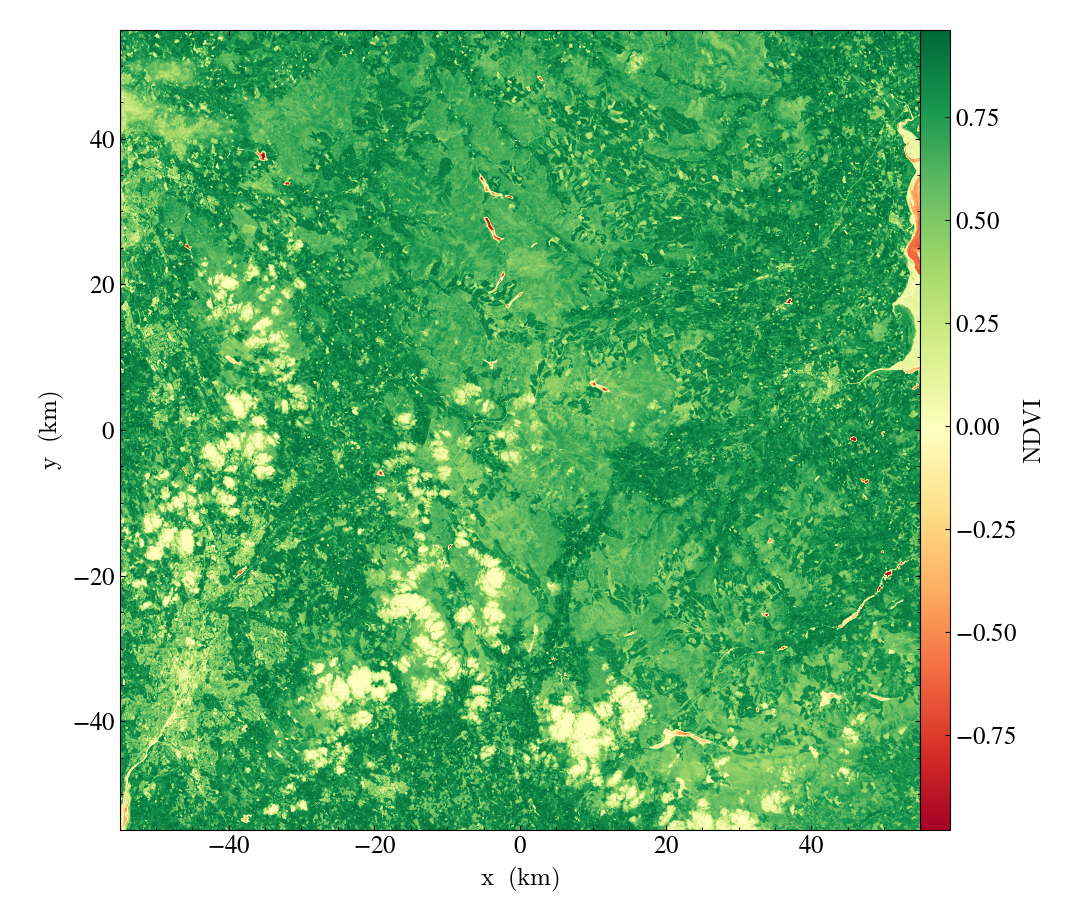

In [26]:
p = yt.SlicePlot(ds, 'z', 'ndvi')
p.set_cmap(field="ndvi", cmap='RdYlGn')

Similarly to the NDVI, we can calculate the NDWI which estimates the water content of vegetation in our satellite image (see Gao 1996 formula for [NDWI](https://en.wikipedia.org/wiki/Normalized_difference_water_index)). 

In [27]:
def _ndwi(field, data):
    return (data[('sentinel2', 'B8A')] - data[('sentinel2', 'B11')]) / \
           (data[('sentinel2', 'B8A')] + data[('sentinel2', 'B11')])

In [28]:
ds.add_field("ndwi", function=_ndwi,
             units="", display_name='NDWI', take_log=False, sampling_type='cell')

In [109]:
def _mcfeeters(field, data):
    return (data[('sentinel2', 'B03')] - data[('sentinel2', 'B8A')]) / \
           (data[('sentinel2', 'B03')] + data[('sentinel2', 'B8A')])

In [110]:
ds.add_field("mcfeeters", function=_mcfeeters,
             units="", display_name='McFeeters', take_log=False, sampling_type='cell')

Due to the grid structure in the yt dataset we can easily measure the projected surface area too.

In [29]:
def _surface_area(field, data):
    return data['index', 'dx'] * data['index', 'dy']

In [30]:
ds.add_field("surface_area", function=_surface_area,
             units="km**2", display_name="surface area", sampling_type='cell')

### Region selection
Often in Earth observation we want to focus on a specific area of interest. In yt we can take a given coordinate and easily select a region around it to zoom in to our area of interest. For example, let's select a circle around the point in our image.

In [105]:
radius = (10., 'km')
xy_coord = [35000., 47000.]
aoi_centroid = yt.YTArray([xy_coord[0], xy_coord[1], ds.domain_width[2]/2], 'm')

In [106]:
sp = ds.sphere(aoi_centroid, radius)

yt : [INFO     ] 2020-07-01 18:59:44,000 xlim = 30000.000000 40000.000000
yt : [INFO     ] 2020-07-01 18:59:44,000 ylim = 42000.000000 52000.000000
yt : [INFO     ] 2020-07-01 18:59:44,001 xlim = 30000.000000 40000.000000
yt : [INFO     ] 2020-07-01 18:59:44,003 ylim = 42000.000000 52000.000000
yt : [INFO     ] 2020-07-01 18:59:44,005 Making a fixed resolution buffer of (('bands', 'ndvi')) 800 by 800



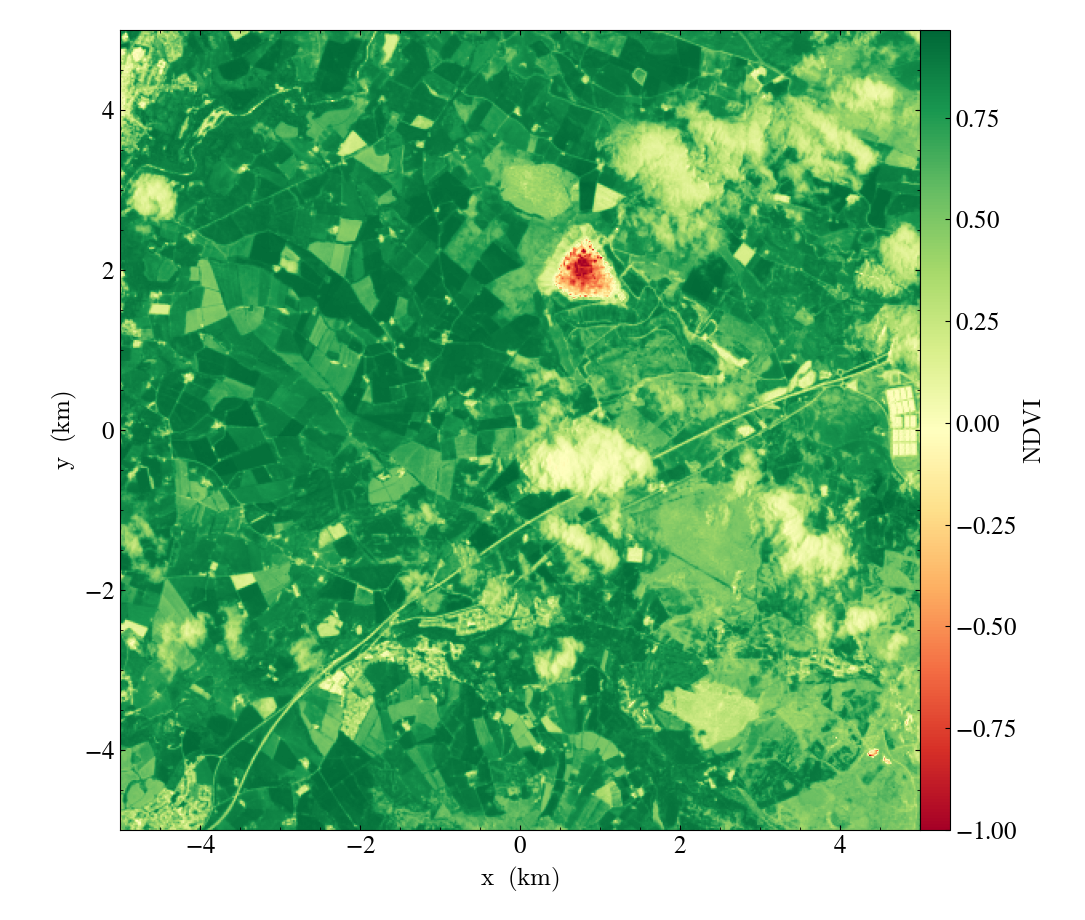

In [107]:
p = yt.SlicePlot(ds, 'z', 'ndvi', data_source=sp, center=aoi_centroid.value,
             width = (10,'km'))
p.set_cmap(field="ndvi", cmap='RdYlGn')

yt : [INFO     ] 2020-07-01 21:40:01,539 xlim = 30000.000000 40000.000000
yt : [INFO     ] 2020-07-01 21:40:01,543 ylim = 42000.000000 52000.000000
yt : [INFO     ] 2020-07-01 21:40:01,544 xlim = 30000.000000 40000.000000
yt : [INFO     ] 2020-07-01 21:40:01,546 ylim = 42000.000000 52000.000000
yt : [INFO     ] 2020-07-01 21:40:01,550 Making a fixed resolution buffer of (('bands', 'ndwi')) 800 by 800



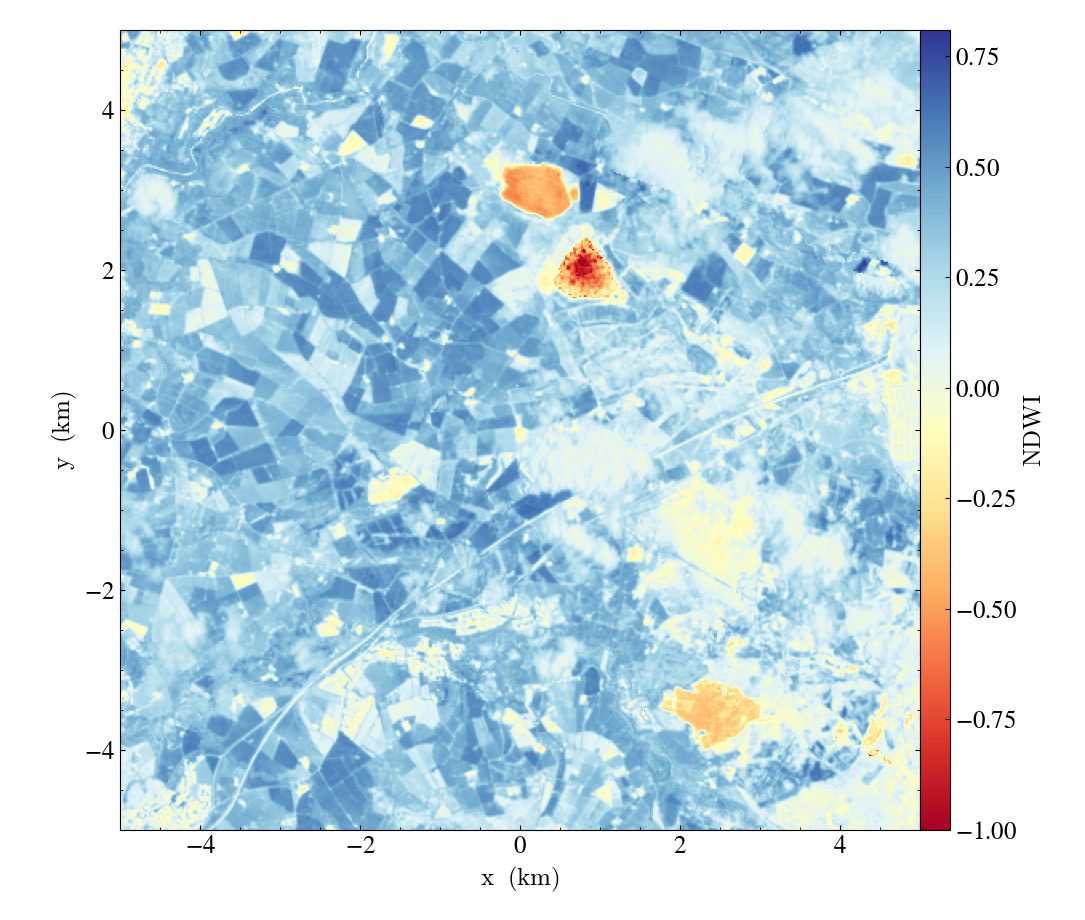

In [108]:
p = yt.SlicePlot(ds, 'z', 'ndwi', data_source=sp, center=aoi_centroid.value,
             width = (10,'km'))
p.set_cmap(field="ndwi", cmap='RdYlBu')

yt : [INFO     ] 2020-07-01 21:42:51,799 xlim = 30000.000000 40000.000000
yt : [INFO     ] 2020-07-01 21:42:51,800 ylim = 42000.000000 52000.000000
yt : [INFO     ] 2020-07-01 21:42:51,802 xlim = 30000.000000 40000.000000
yt : [INFO     ] 2020-07-01 21:42:51,805 ylim = 42000.000000 52000.000000
yt : [INFO     ] 2020-07-01 21:42:51,807 Making a fixed resolution buffer of (('bands', 'mcfeeters')) 800 by 800



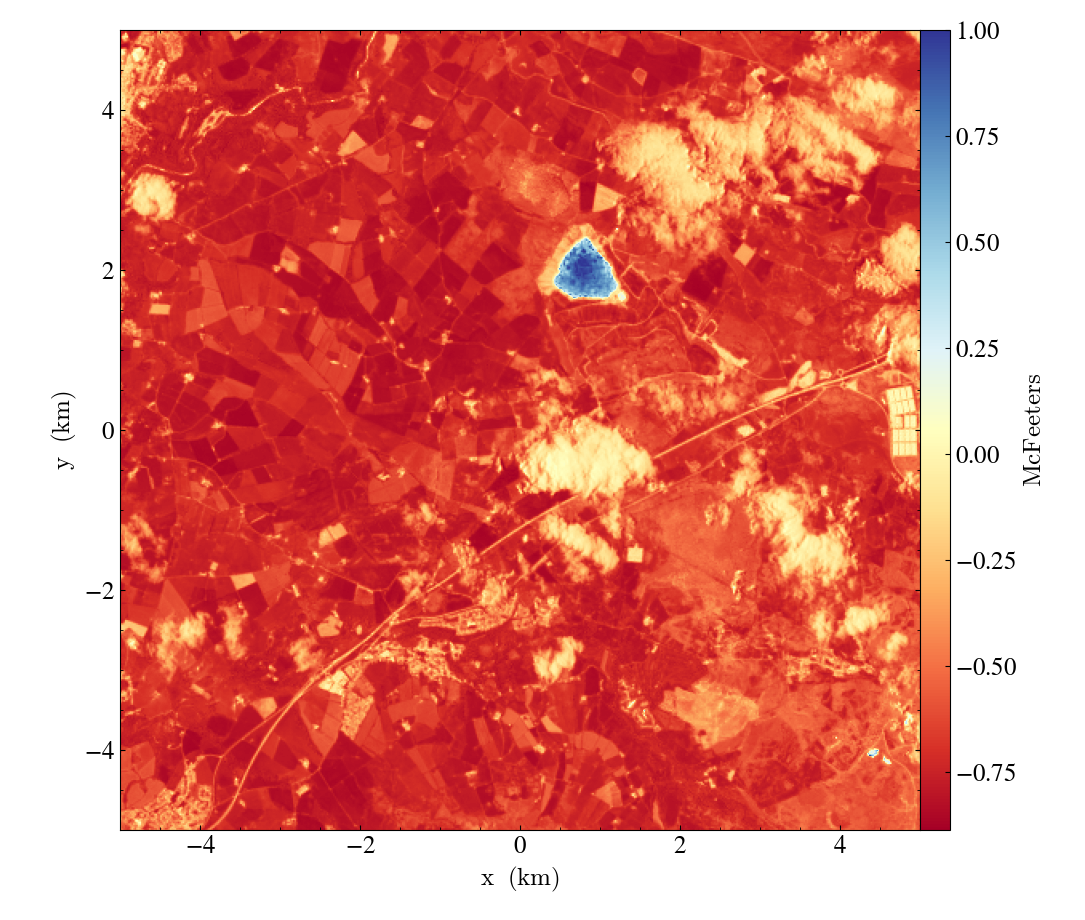

In [111]:
p = yt.SlicePlot(ds, 'z', 'mcfeeters', data_source=sp, center=aoi_centroid.value,
             width = (10,'km'))
p.set_cmap(field="mcfeeters", cmap='RdYlBu')


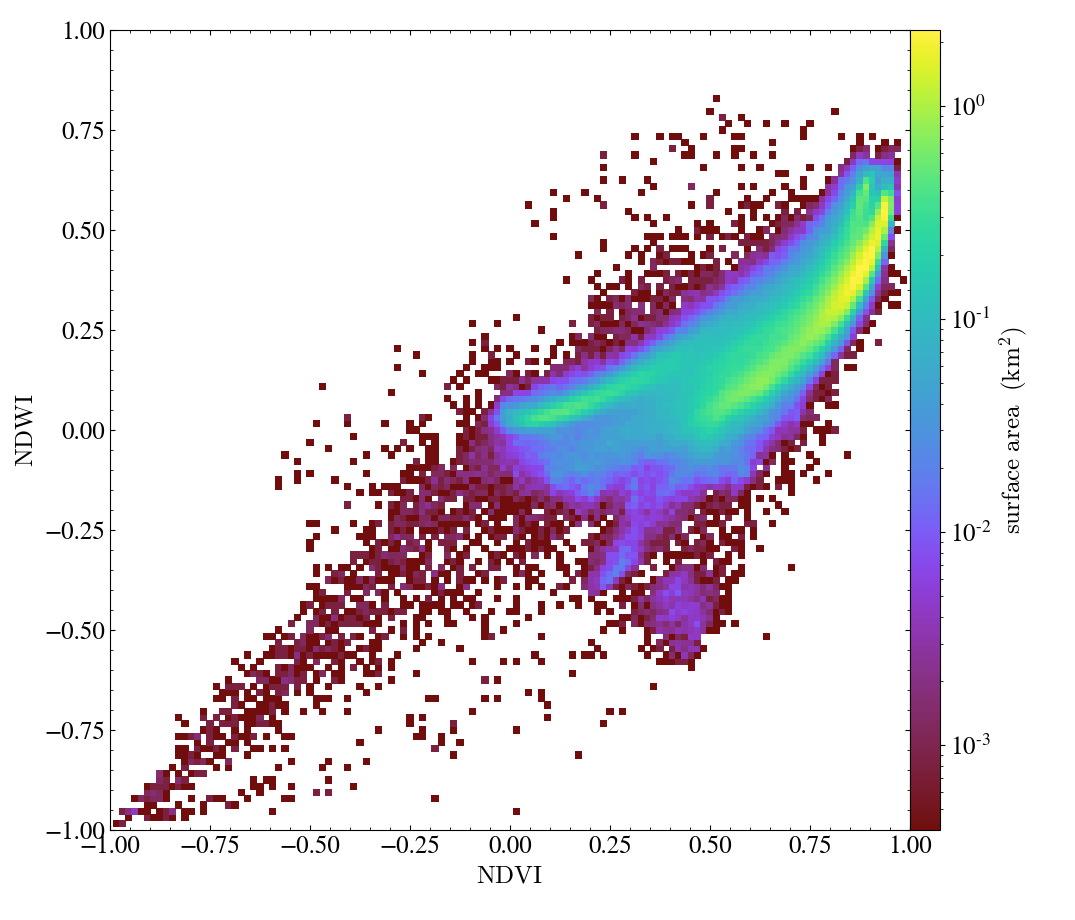

In [141]:
phase = yt.PhasePlot(sp, 'ndvi', 'ndwi', 'surface_area', weight_field=None)
phase.set_xlim(-1, 1).set_ylim(-1, 1)

### Cloud masks with cut_region

#### Scene Classification
When we are dealing with optical earth observation data there can be clouds obscuring our field of view. Fortunately, L2 Sentinel 2 data comes with a 20m scene classification mask which labels each pixel as belonging to 1 of 12 classes (see [here](https://earth.esa.int/web/sentinel/technical-guides/sentinel-2-msi/level-2a/algorithm) for more information on the model used to classify the pixels). Of course this classification model isn't perfect but it can be used to get a decent cloud mask.
0: NODATA  
1: SATURATED_OR_DEFECTIVE  
2: DARK_AREA_PIXELS  
3: CLOUD_SHADOWS  
4: VEGETATION  
5: NOT_VEGETATED  
6: WATER  
7: UNCLASSIFIED  
8: CLOUD_MEDIUM_PROBABILITY  
9: CLOUD_HIGH_PROBABILITY  
10: THIN_CIRRUS  
11: SNOW  

Using the classification mask, we can mask-out the cloud covered areas of our dataset with yt's cut_region functionality.

yt : [INFO     ] 2020-07-01 21:53:00,810 xlim = 30000.000000 40000.000000
yt : [INFO     ] 2020-07-01 21:53:00,810 ylim = 42000.000000 52000.000000
yt : [INFO     ] 2020-07-01 21:53:00,811 xlim = 30000.000000 40000.000000
yt : [INFO     ] 2020-07-01 21:53:00,813 ylim = 42000.000000 52000.000000
yt : [INFO     ] 2020-07-01 21:53:00,817 Making a fixed resolution buffer of (('sentinel2', 'SCL')) 800 by 800



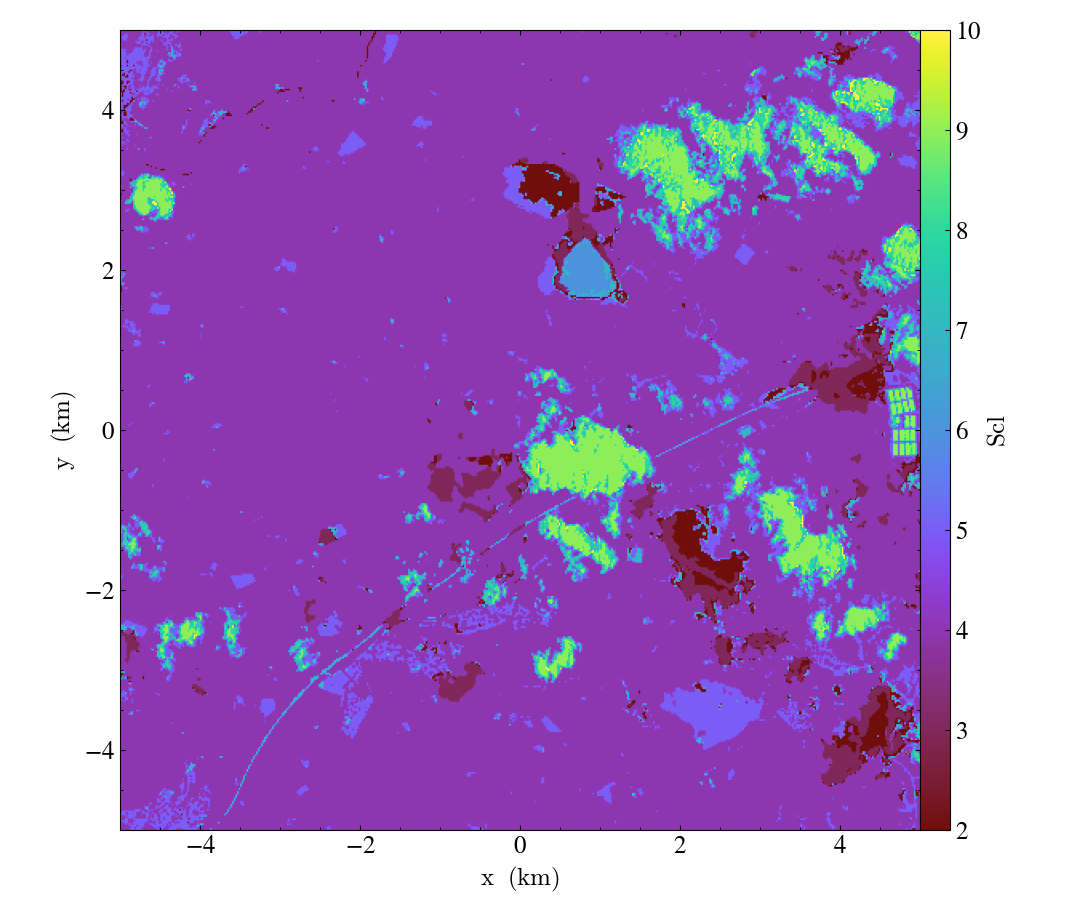

In [121]:
p = yt.SlicePlot(ds, 'z', ('sentinel2', 'SCL'), data_source=sp, center=aoi_centroid.value,
             width = (10,'km'))
p.set_log(('sentinel2', 'SCL'), False)


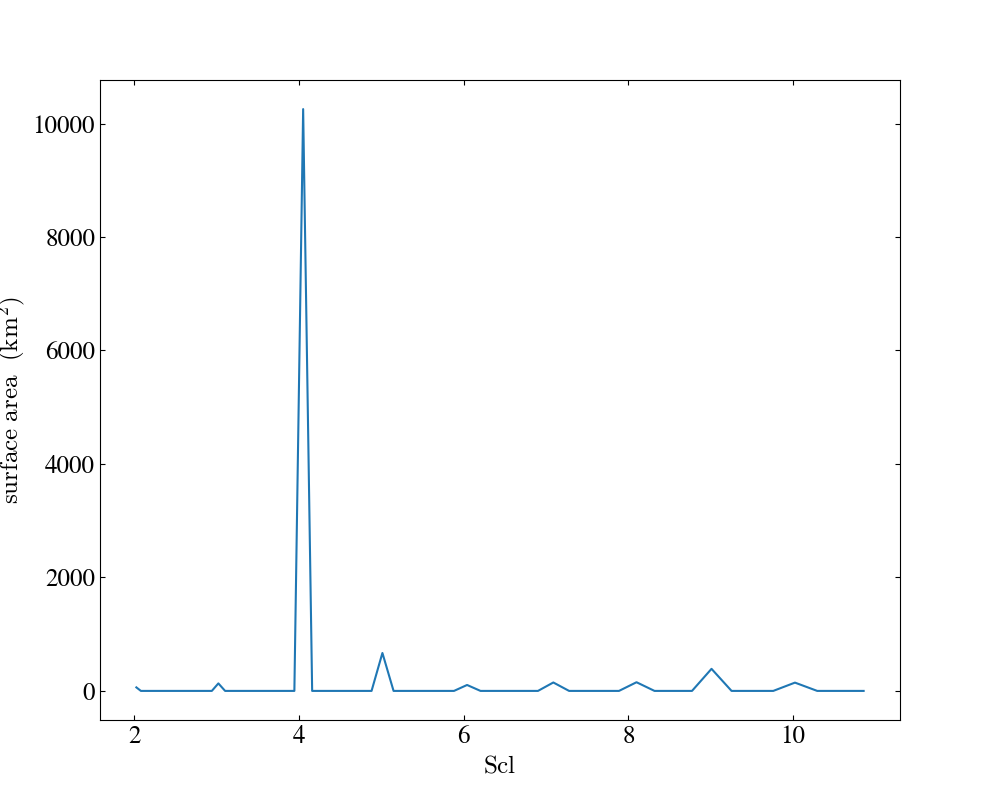

In [132]:
ad = ds.all_data()
p = yt.ProfilePlot(ad, ('sentinel2', 'SCL'), 'surface_area', weight_field=None)
p.set_log(('sentinel2', 'SCL'), False)
p.set_log('surface_area', False)

In [122]:
cr_veg = sp.cut_region(["obj['sentinel2', 'SCL'] == 4"])  # single out vegetation


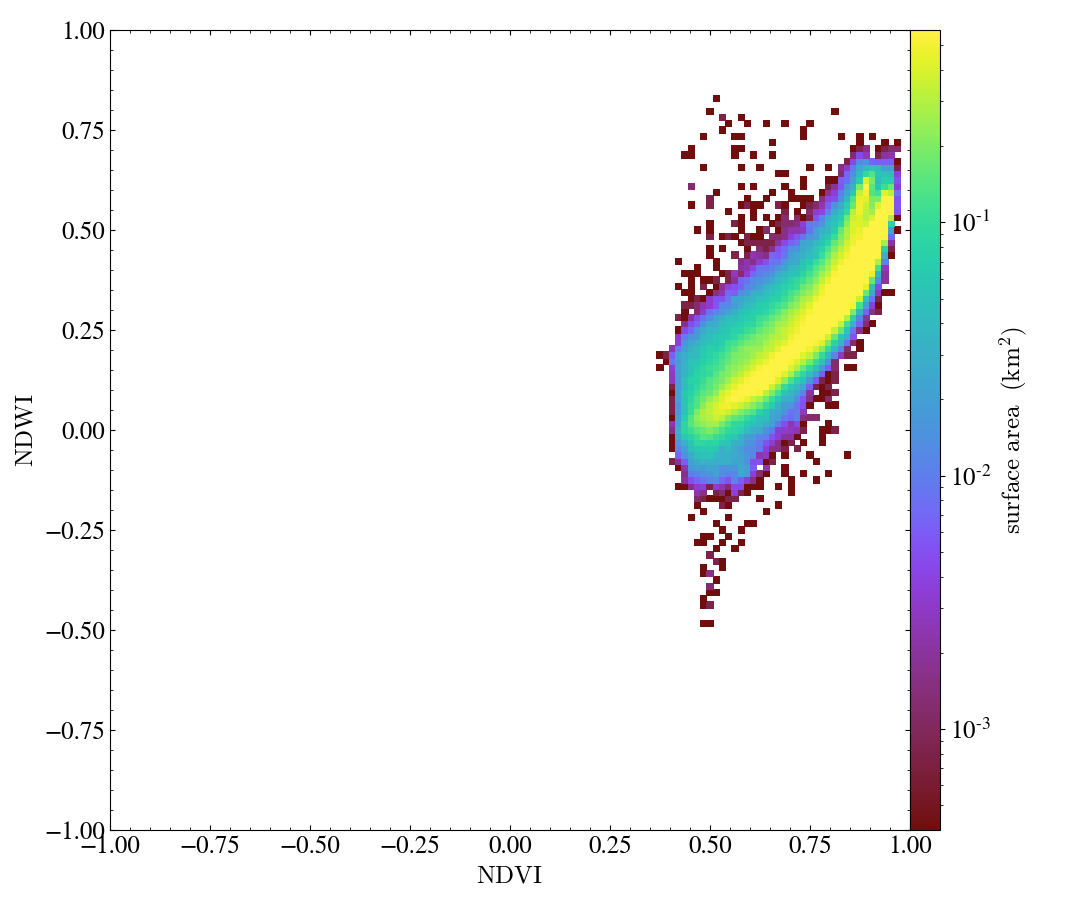

In [142]:
# vegetation
phase = yt.PhasePlot(cr_veg, 'ndvi', 'ndwi', 'surface_area', weight_field=None)
phase.set_xlim(-1, 1).set_ylim(-1, 1)

### Other phase plots


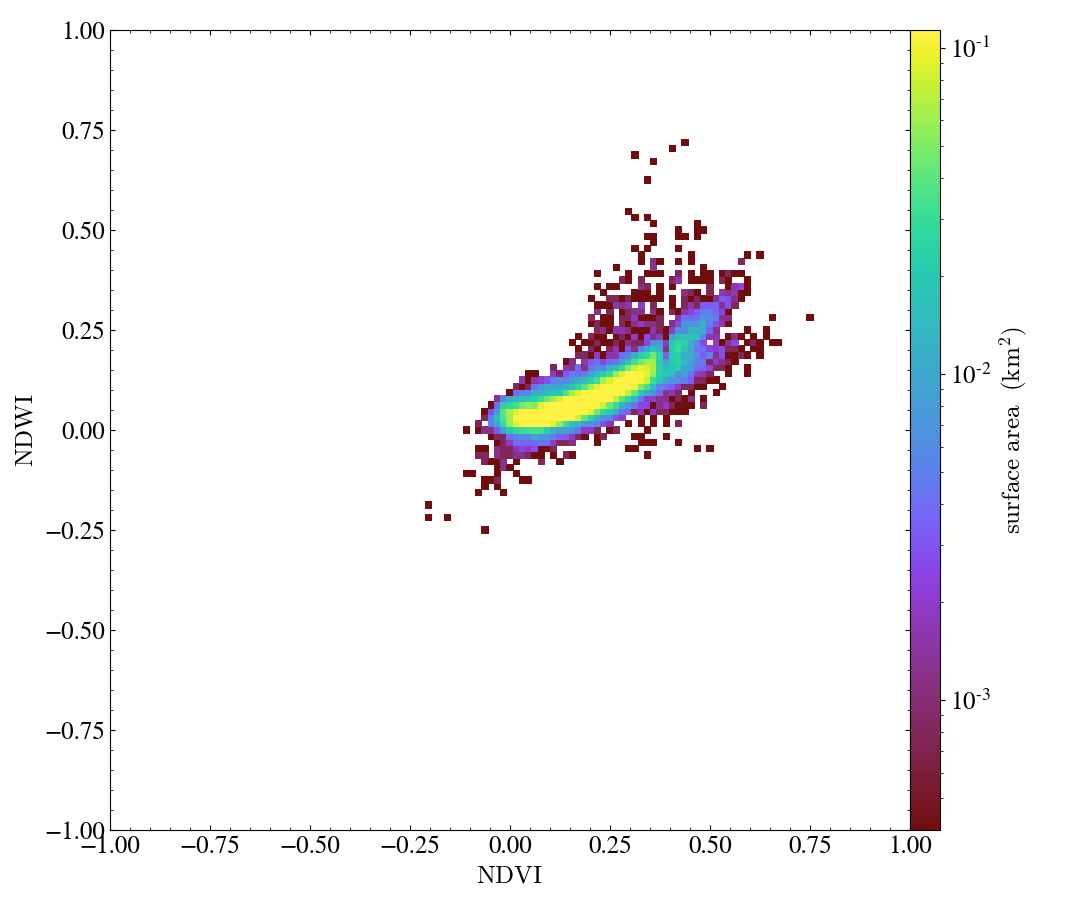

In [146]:
# clouds
phase = yt.PhasePlot(sp.cut_region(["(obj['sentinel2', 'SCL'] == 8) | \
                                     (obj['sentinel2', 'SCL'] == 9) | \
                                     (obj['sentinel2', 'SCL'] == 10)"]),
                     'ndvi',
                     'ndwi',
                     'surface_area',
                     weight_field=None)
phase.set_xlim(-1, 1).set_ylim(-1, 1)


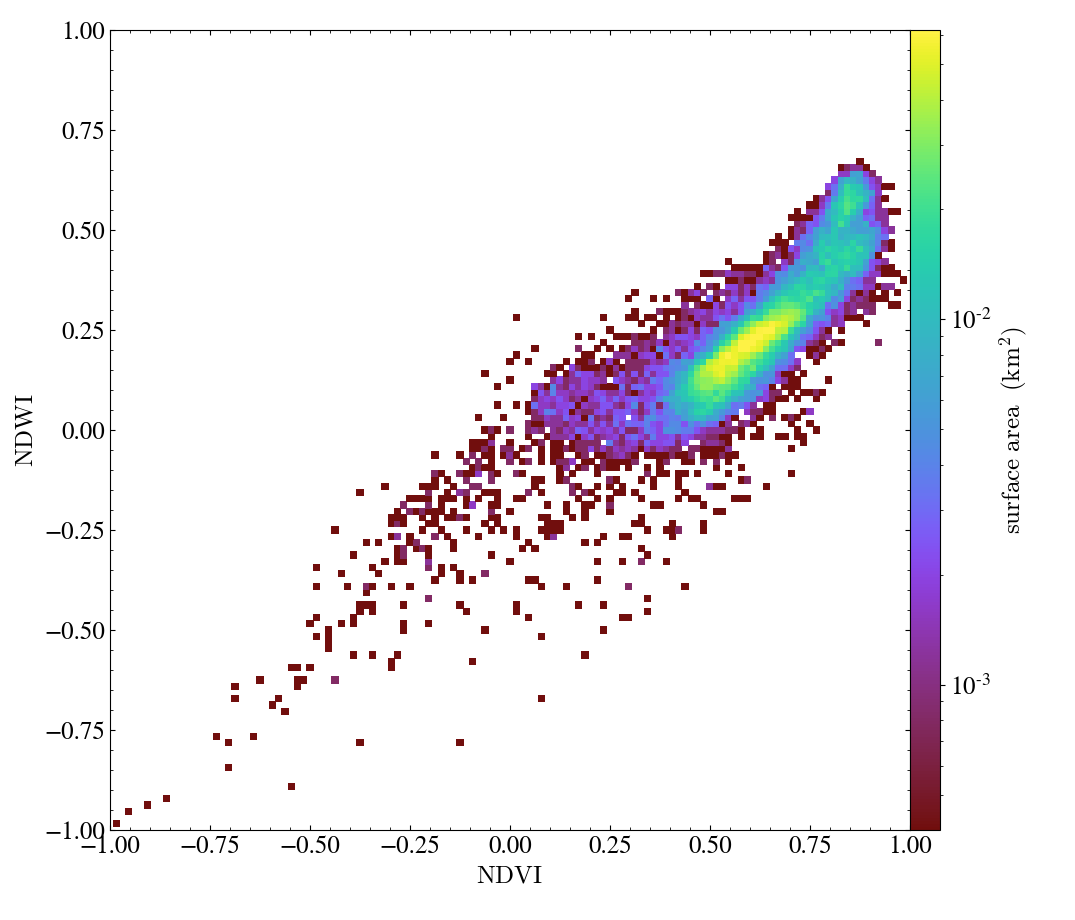

In [143]:
# cloud shadows
phase = yt.PhasePlot(sp.cut_region(["obj['sentinel2', 'SCL'] == 3"]),
                     'ndvi',
                     'ndwi',
                     'surface_area',
                     weight_field=None)
phase.set_xlim(-1, 1).set_ylim(-1, 1)


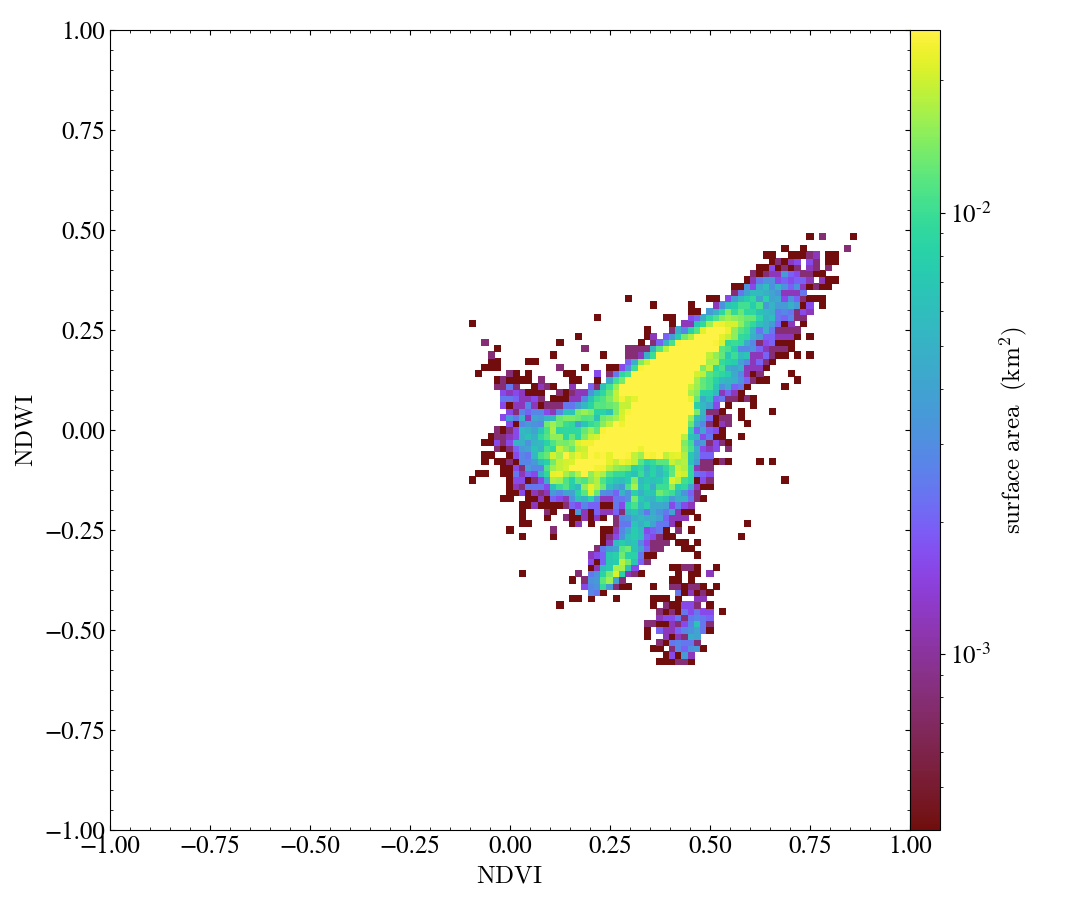

In [145]:
# Non-vegetated
phase = yt.PhasePlot(sp.cut_region(["(obj['sentinel2', 'SCL'] == 5)"]),
                     'ndvi',
                     'ndwi',
                     'surface_area',
                     weight_field=None)
phase.set_xlim(-1, 1).set_ylim(-1, 1)